# Case Study from Youtube https://www.youtube.com/watch?v=xArNPFG_nq0&list=WL&index=28&t=185s

In [312]:
import pandas as pd;
import matplotlib.pyplot as plt;
import numpy as np;

In [149]:
df = pd.read_csv('./data/singapore-residents data.csv')
df[df['year'] == 1960]

,year,level_1,value
0,1960,Total Residents,1646400
1,1960,Total Male Residents,859600
2,1960,Total Female Residents,786800
3,1960,Total Malays,232200
4,1960,Total Male Malays,121000
5,1960,Total Female Malays,111200
6,1960,Total Chinese,1251600
7,1960,Total Male Chinese,636000
8,1960,Total Female Chinese,615600
9,1960,Total Indians,133200


# Adjust DataSet

## Normalize data by removing calculated columns

In [150]:
idx = df[df['level_1'].str.contains('Residents') | df['level_1'].str.contains('Total Malays') | df['level_1'].str.contains('Total Chinese') | 
         df['level_1'].str.contains('Total Indians') | df['level_1'].str.contains('Other Ethnic Groups \(Total\)')].index
df.drop(idx, inplace= True)
df.head(10)

,year,level_1,value
4,1960,Total Male Malays,121000
5,1960,Total Female Malays,111200
7,1960,Total Male Chinese,636000
8,1960,Total Female Chinese,615600
10,1960,Total Male Indians,88000
11,1960,Total Female Indians,45200
13,1960,Other Ethnic Groups (Males),14600
14,1960,Other Ethnic Groups (Females),14800
19,1961,Total Male Malays,125700
20,1961,Total Female Malays,116800


## Turn rows into Columns using Pivot Table

In [210]:
pvt = df.pivot_table(index='year', columns='level_1', values='value')
pvt.head(2)

level_1,Other Ethnic Groups (Females),Other Ethnic Groups (Males),Total Female Chinese,Total Female Indians,Total Female Malays,Total Male Chinese,Total Male Indians,Total Male Malays
year,,,,,,,,
1960,14800.0,14600.0,615600.0,45200.0,111200.0,636000.0,88000.0,121000.0
1961,14800.0,14400.0,637400.0,46900.0,116800.0,657600.0,88800.0,125700.0


## Rearrange columns

In [213]:
pvt = pvt[['Total Male Malays', 'Total Female Malays', 'Total Male Chinese', 'Total Female Chinese', 'Total Male Indians',
           'Total Female Indians', 'Other Ethnic Groups (Males)', 'Other Ethnic Groups (Females)']]
pvt.head(2)

level_1,Total Male Malays,Total Female Malays,Total Male Chinese,Total Female Chinese,Total Male Indians,Total Female Indians,Other Ethnic Groups (Males),Other Ethnic Groups (Females)
year,,,,,,,,
1960,121000.0,111200.0,636000.0,615600.0,88000.0,45200.0,14600.0,14800.0
1961,125700.0,116800.0,657600.0,637400.0,88800.0,46900.0,14400.0,14800.0


# At What rate singapore populaton is increasing?

In [214]:
# Get the sum for each row, then find the percentage change:
#df.iloc[0,:].sum()
pct = pvt.sum(axis=1).pct_change(periods=1) * 100
np.mean(pct)
# Population increases by 1.5% yearly

1.546640596112704

# Which Ethinic group has the highest representation in Singapore?

In [228]:
# Sum each group then get their max
sums = pvt.sum(axis=0)
sums = sums.to_frame().reset_index()
sums

,level_1,0
0,Total Male Malays,11702782.0
1,Total Female Malays,11446983.0
2,Total Male Chinese,62671373.0
3,Total Female Chinese,63112372.0
4,Total Male Indians,6970639.0
5,Total Female Indians,5866098.0
6,Other Ethnic Groups (Males),1558752.0
7,Other Ethnic Groups (Females),1668893.0


In [247]:
sums.groupby(sums.index // 2).sum().sort_values(by=0)
# Chinese are the largest ethnic group

,level_1,0
3,Other Ethnic Groups (Males)Other Ethnic Groups...,3227645.0
2,Total Male IndiansTotal Female Indians,12836737.0
0,Total Male MalaysTotal Female Malays,23149765.0
1,Total Male ChineseTotal Female Chinese,125783745.0


# In last 10 years which ethnic group showed the highest increment?

In [255]:
# Get the last 10 years sums
pvt.sort_index().tail(10).sum().sort_values()

# Chinese show the highest increment in last 10 years

level_1
Other Ethnic Groups (Males)        595798.0
Other Ethnic Groups (Females)      665241.0
Total Female Indians              1711801.0
Total Male Indians                1815753.0
Total Male Malays                 2569087.0
Total Female Malays               2593827.0
Total Male Chinese               14012894.0
Total Female Chinese             14660470.0
dtype: float64

# In which years female populations were higher than male

In [307]:
# sum all male and female, then show the years where female were higher
#female_male_sums = 
males = pvt[pvt.columns[pvt.columns.str.contains('Male')]].sum(axis=1)
males.rename('Males', inplace=True).head(2)

year
1960    859600.0
1961    886500.0
Name: Males, dtype: float64

In [308]:
females = pvt[pvt.columns[pvt.columns.str.contains('Female')]].sum(axis=1)
females.rename('Females', inplace=True).head(2)

year
1960    786800.0
1961    815900.0
Name: Females, dtype: float64

In [288]:
# pd.concat([males, females], axis=1)
f_m_totals = pd.merge(males, females, right_on=males.index, left_on=females.index)
f_m_totals.head(2)

,key_0,Males,Females
0,1960,859600.0,786800.0
1,1961,886500.0,815900.0


In [306]:
filtered = f_m_totals[f_m_totals['Females'] > f_m_totals['Males']]
filtered['key_0'].reset_index()

# Females incremented more than Males for 20 years from 1999 to 2018

,index,key_0
0,39,1999
1,40,2000
2,41,2001
3,42,2002
4,43,2003
5,44,2004
6,45,2005
7,46,2006
8,47,2007
9,48,2008


# What is the trend of the past 10 years in male and female population?

'\nfor rect, label in zip(ax[1].patches, f_m_totals[\'Females\'].tail(10)):\n    height = rect.get_height()\n    ax[1].text(\n        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"\n    )\n'

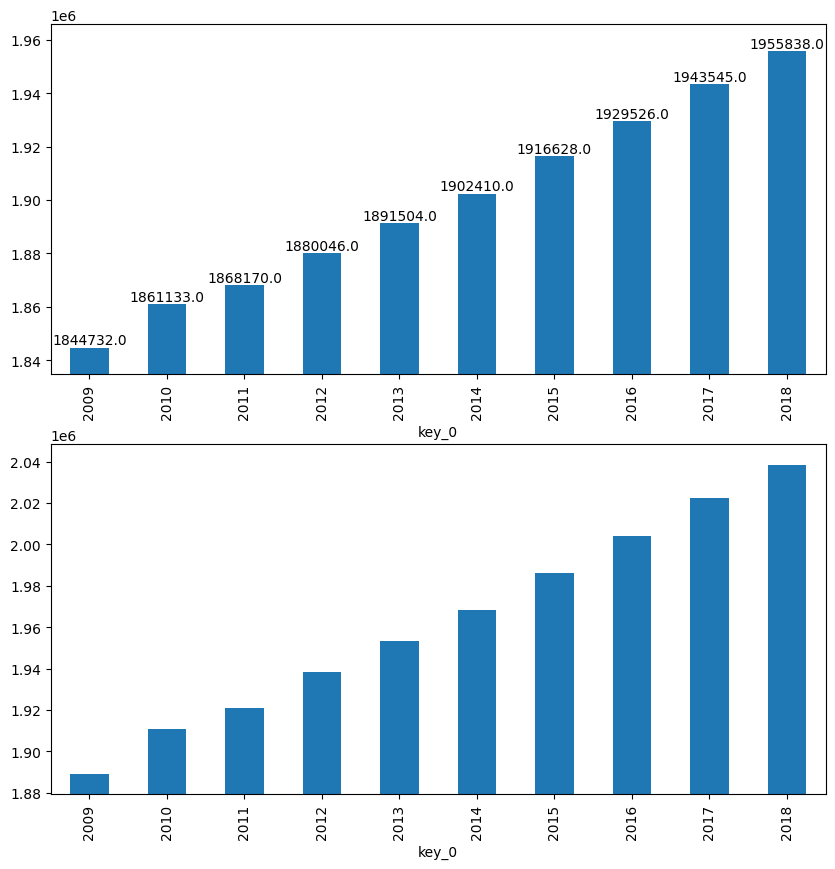

In [456]:
males = f_m_totals['Males'].tail(10)
males.index = f_m_totals['key_0'].tail(10)

females = f_m_totals['Females'].tail(10)
females.index = males.index


fig, ax = plt.subplots(2, figsize=(10,10))

ax[0].set_ylim(males.min() - 10000, males.max() + 10000)
males.plot.bar(ax=ax[0])

for rect, label in zip(ax[0].patches, males):
    height = rect.get_height()
    ax[0].text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

ax[1].set_ylim(females.min() - 10000, females.max() + 10000)
#ax[1].bar_label(ax[1].containers[0], label_type= 'edge', lables=females)
females.plot.bar(ax=ax[1])

"""
for rect, label in zip(ax[1].patches, f_m_totals['Females'].tail(10)):
    height = rect.get_height()
    ax[1].text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )
"""